<a href="https://colab.research.google.com/github/PearlSikka/Battles-in-Time/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Using image features, such as colour, histogram-of-gradients (e.g. SIFT/SURF), and/or
texture or Gabor features, write a feature based matcher to compare pairs of card images
and determine if they are similar. Using your image matcher, on all the 'unidentified' cards
in train-001.jpg to find the closest M matches, e.g. M = 5, from all the other cards in the
training images.

CODE HAS BEEN TESTED ON GOOGLE COLAB ON PYTHON VERSION 3.7.12

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing necessary libraries**

In [ ]:
import matplotlib.pyplot as plt                                                   #for plotting images 
import numpy as np                                                                #library for mathematical operations            
from PIL import Image                                                             
import glob                                                                       #for reading files
import os                                                                         #for performing os operations
                    
import matplotlib.image as mpimg                                                  
import cv2                                                                        #opencv

from google.colab.patches import cv2_imshow


In [ ]:
!pip install opencv-contrib-python==4.4.0.44                                      #downgrade opencv to use sift_create 

In [ ]:
data_dir='drive/My Drive/Image_Analysis/DATA/'                                    #data directory path
results_dir='drive/My Drive/Image_Analysis/RESULTS_3/'                            #results directory path

**Reading card images from results_dir which were output of task-1** : Separated cards which were output of task-1 have been imported using glob from the results_dir. Cards with corresponding training set have been put into same class. E.g. cards from train_001 have been assigned class=1 and train_002 have been assigned class=2 and so on. 

All card images have been appended to images[] with corresponding classes in classes[].

In [ ]:
images = []
classes = []
names=[]

for i in range(10):
  
  filenames = glob.glob(results_dir + 'train-00'+ str(i+1) +'*.jpg')              #reading training sets from 001-009

  for j in range(len(filenames)):      
    im_gbr = cv2.imread(filenames[j])
    name = os.path.splitext(os.path.basename(filenames[j]))[0] 
    im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)                                   # convert from BGR ordering to RGB

    images.append(im)
    names.append(name)
    classes.append(i+1)
   

filenames = glob.glob(results_dir + 'train-010'+'*.jpg')

for j in range(len(filenames)):      
    
    im = cv2.imread(filenames[j])
    name = os.path.splitext(os.path.basename(filenames[j]))[0]
    im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)                                    # convert from BGR ordering to RGB

    images.append(im)
    names.append(name)
    classes.append(10)
   

filenames = glob.glob(results_dir + 'train-012'+'*.jpg')

for j in range(len(filenames)):      
   
    im = cv2.imread(filenames[j])
    name = os.path.splitext(os.path.basename(filenames[j]))[0]
    im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)                                   # convert from BGR ordering to RGB

    images.append(im)
    names.append(name)
    classes.append(12)
   

filenames = glob.glob(results_dir + 'train-013'+'*.jpg')

for j in range(len(filenames)):      
    
    im_gbr = cv2.imread(filenames[j])
    name = os.path.splitext(os.path.basename(filenames[j]))[0]
    im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)                                   # convert from BGR ordering to RGB

    images.append(im)
    names.append(name)
    classes.append(13)

filenames = glob.glob(results_dir + 'train-014'+'*.jpg')

for j in range(len(filenames)):      
    
    im = cv2.imread(filenames[j])
    name = os.path.splitext(os.path.basename(filenames[j]))[0]
    im = cv2.cvtColor(im_gbr,cv2.COLOR_BGR2RGB)                                    # convert from BGR ordering to RGB

    images.append(im)
    names.append(name)
    classes.append(14)
   
print('read ', len(images), ' images ')    


read  219  images 


In [ ]:
(set(classes))                                                                       #different train sets classes 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14}

Plotting random images from their respective classes of training sets

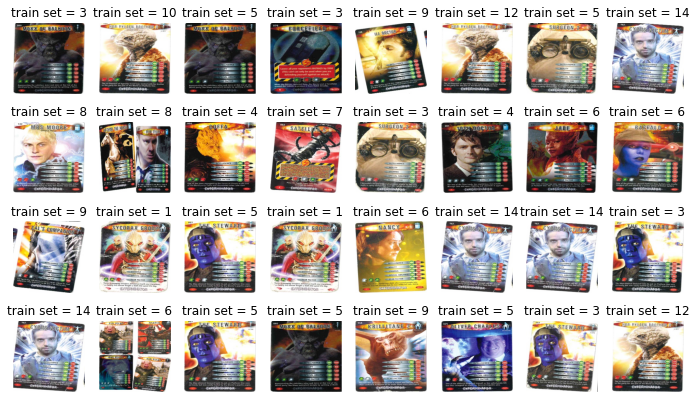

In [ ]:
fig = plt.figure(figsize=(12,7))
for i in range(32):

    r = np.random.randint(0,len(images))
    
    plt.subplot(4,8,i+1)
    plt.axis('off')
    plt.title('train set = '+str(classes[r]))
    plt.imshow(images[r])
    
plt.show()

**Finding SIFT features**: After importing the cards, to find features of card, SIFT(Scale-invariant feature transform) features have been used. SIFT features are invariant to scale and rotation. Opencv provides sift_create() to get image features.  

In [ ]:

sift = cv2.SIFT_create(contrastThreshold=0.02,sigma=1.35)                         # sift engine

print('Finding sift features over all the images...')

kps = []
keypoint_img=[]                                                                   # for keypoints
descr_im=[]                                                                       # for descriptors
for i in range(len(images)):                                                      # over all the images
    
    image = images[i]
                                                     
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)                                # calculate SIFT features on gray-scale version of image
    kp, desc = sift.detectAndCompute(gray, None)                                  # computing descriptors and keypoints  
    
    assert len(kp)>0
    
    kps.append(len(kp))                                                           
    keypoint_img.append(kp)
    descr_im.append(desc)

print('...done')

Finding sift features over all the images...
...done


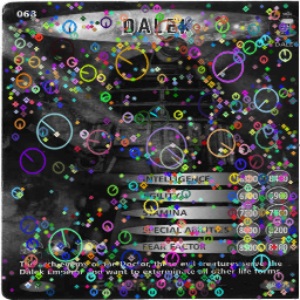

In [ ]:
#plotting keypoints for a random image from training set

image= images[70]
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

img=cv2.drawKeypoints(gray,keypoint_img[0],image,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)          #function to draw keypoints
resized_image = cv2.resize(img, (300,300))

cv2_imshow(resized_image)

Number of images run  219


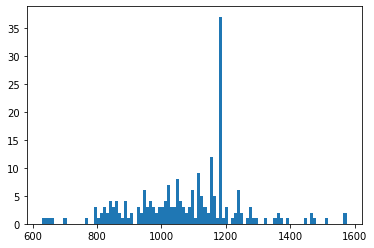

In [ ]:
# We can plot a histogram of the numbers of key points which were 
# extracted across all the images
print('Number of images run ', len(kps))

# histogram of numbers of kps 
plt.hist(np.array(kps), bins=100)
plt.show()


**Implementing feature matcher using Flann Matcher on pair of images**: Flann feature matcher works on pair of features of images. It tries to find the match between the descriptors obtained from SIFT features. Using Lowe's distance test between the matches, maximum matches are returned.

In [ ]:
FLANN_INDEX_KDTREE = 0                                                           #Flann KD Tree algorithm 
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)                   #index params with trees set to 5 
search_params = dict(checks=5)                                                   #search params with checks set to 5     
flann = cv2.FlannBasedMatcher(index_params,search_params)                        #Flann Matcher initialized with index and search params 

In [ ]:
def flannmatch(id1, id2):                                                         #id1 and id2 represents the index of the images for 
                                                                                  #which feature matching will be performed   
  matches = flann.knnMatch(descr_im[id1],descr_im[id2],k=2)                       #flann matching on descriptors for images with index id1 and id2
  maxCount=0
  count = 0
                                                                                  # ratio test as per Lowe's paper
  for (m,n) in matches:
    if m.distance < 0.7 * n.distance:                                             #matches which satisfy the distance condition are stored     
          count += 1      

  if count > maxCount:                                                            
    maxCount = count                                                              #maxcount of matches between images is returned
    
  return maxCount


Total number of matches between image 21 and image 76 is 44


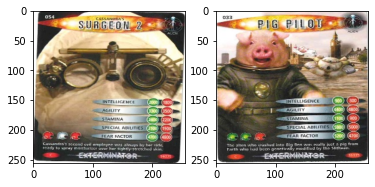

In [ ]:
plt.subplot(1,2,1)
plt.imshow(images[21])
plt.subplot(1,2,2)
plt.imshow(images[76])

m_score= flannmatch(21,76)                                                        #finding match for image with index 21 and index 76.
print(f'Total number of matches between image 21 and image 76 is {m_score}') 

**Finding top 5 matches for train-001 card images**: To implement this, images from train-001 which are in class=1 are compared with images in all other classes. Flann matcher returns score for all the matches which are stored in m_score dictionary with {index, score} key-value pairs. The scores are then sorted and top 5 images with highest scores are filtered. match_list_001 contains the top 5 scoring card indexes for all 16 images from train_001.    


In [ ]:
match_list_001=[]
for i in range(len(classes)):
    m_score={}
    if classes[i]==1:
      print(f'finding match for {i+1} image')
    for j in range(len(classes)):
      if classes[i]==1:
        if classes[j]!=1:
          k=flannmatch(i,j)
          m_score[j]= k
    li=sorted(m_score, key=m_score.get, reverse=True)[:5]

    match_list_001.append(li)                                                    


finding match for 1 image
finding match for 2 image
finding match for 3 image
finding match for 4 image
finding match for 5 image
finding match for 6 image
finding match for 7 image
finding match for 8 image
finding match for 9 image
finding match for 10 image
finding match for 11 image
finding match for 12 image
finding match for 13 image
finding match for 14 image
finding match for 15 image
finding match for 16 image


**The 16 "unidentified" images from train-001 set are shown below**: These are the images from class=1 for which we ran the above process of feature matching and found top-5 scoring card matches.  

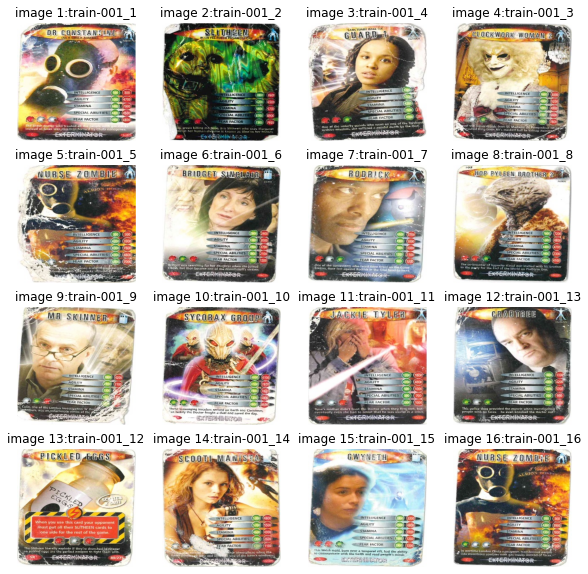

In [ ]:
#plotting images of train-001 set.

fig = plt.figure(figsize=(10,10))

for i in range(len(classes)):
  if classes[i]==1:                                                               #class=1                                             
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.title(f'image {i+1}:{names[i]}')
    plt.imshow(images[i])


**Top-5 matches found** : The top-5 matching cards are found for each train-001 image. For Image 1, matches like Dr Constantine, Slitheen, Mr Crant, Surgeon and Rodrick are found which are all from different training set images. Similarly for other 15 images, top-5 matches can be seen below. 
Since there are some duplicate images in training sets, the feature matcher will return those as well as it is iterating on all images irrespective of IDs.

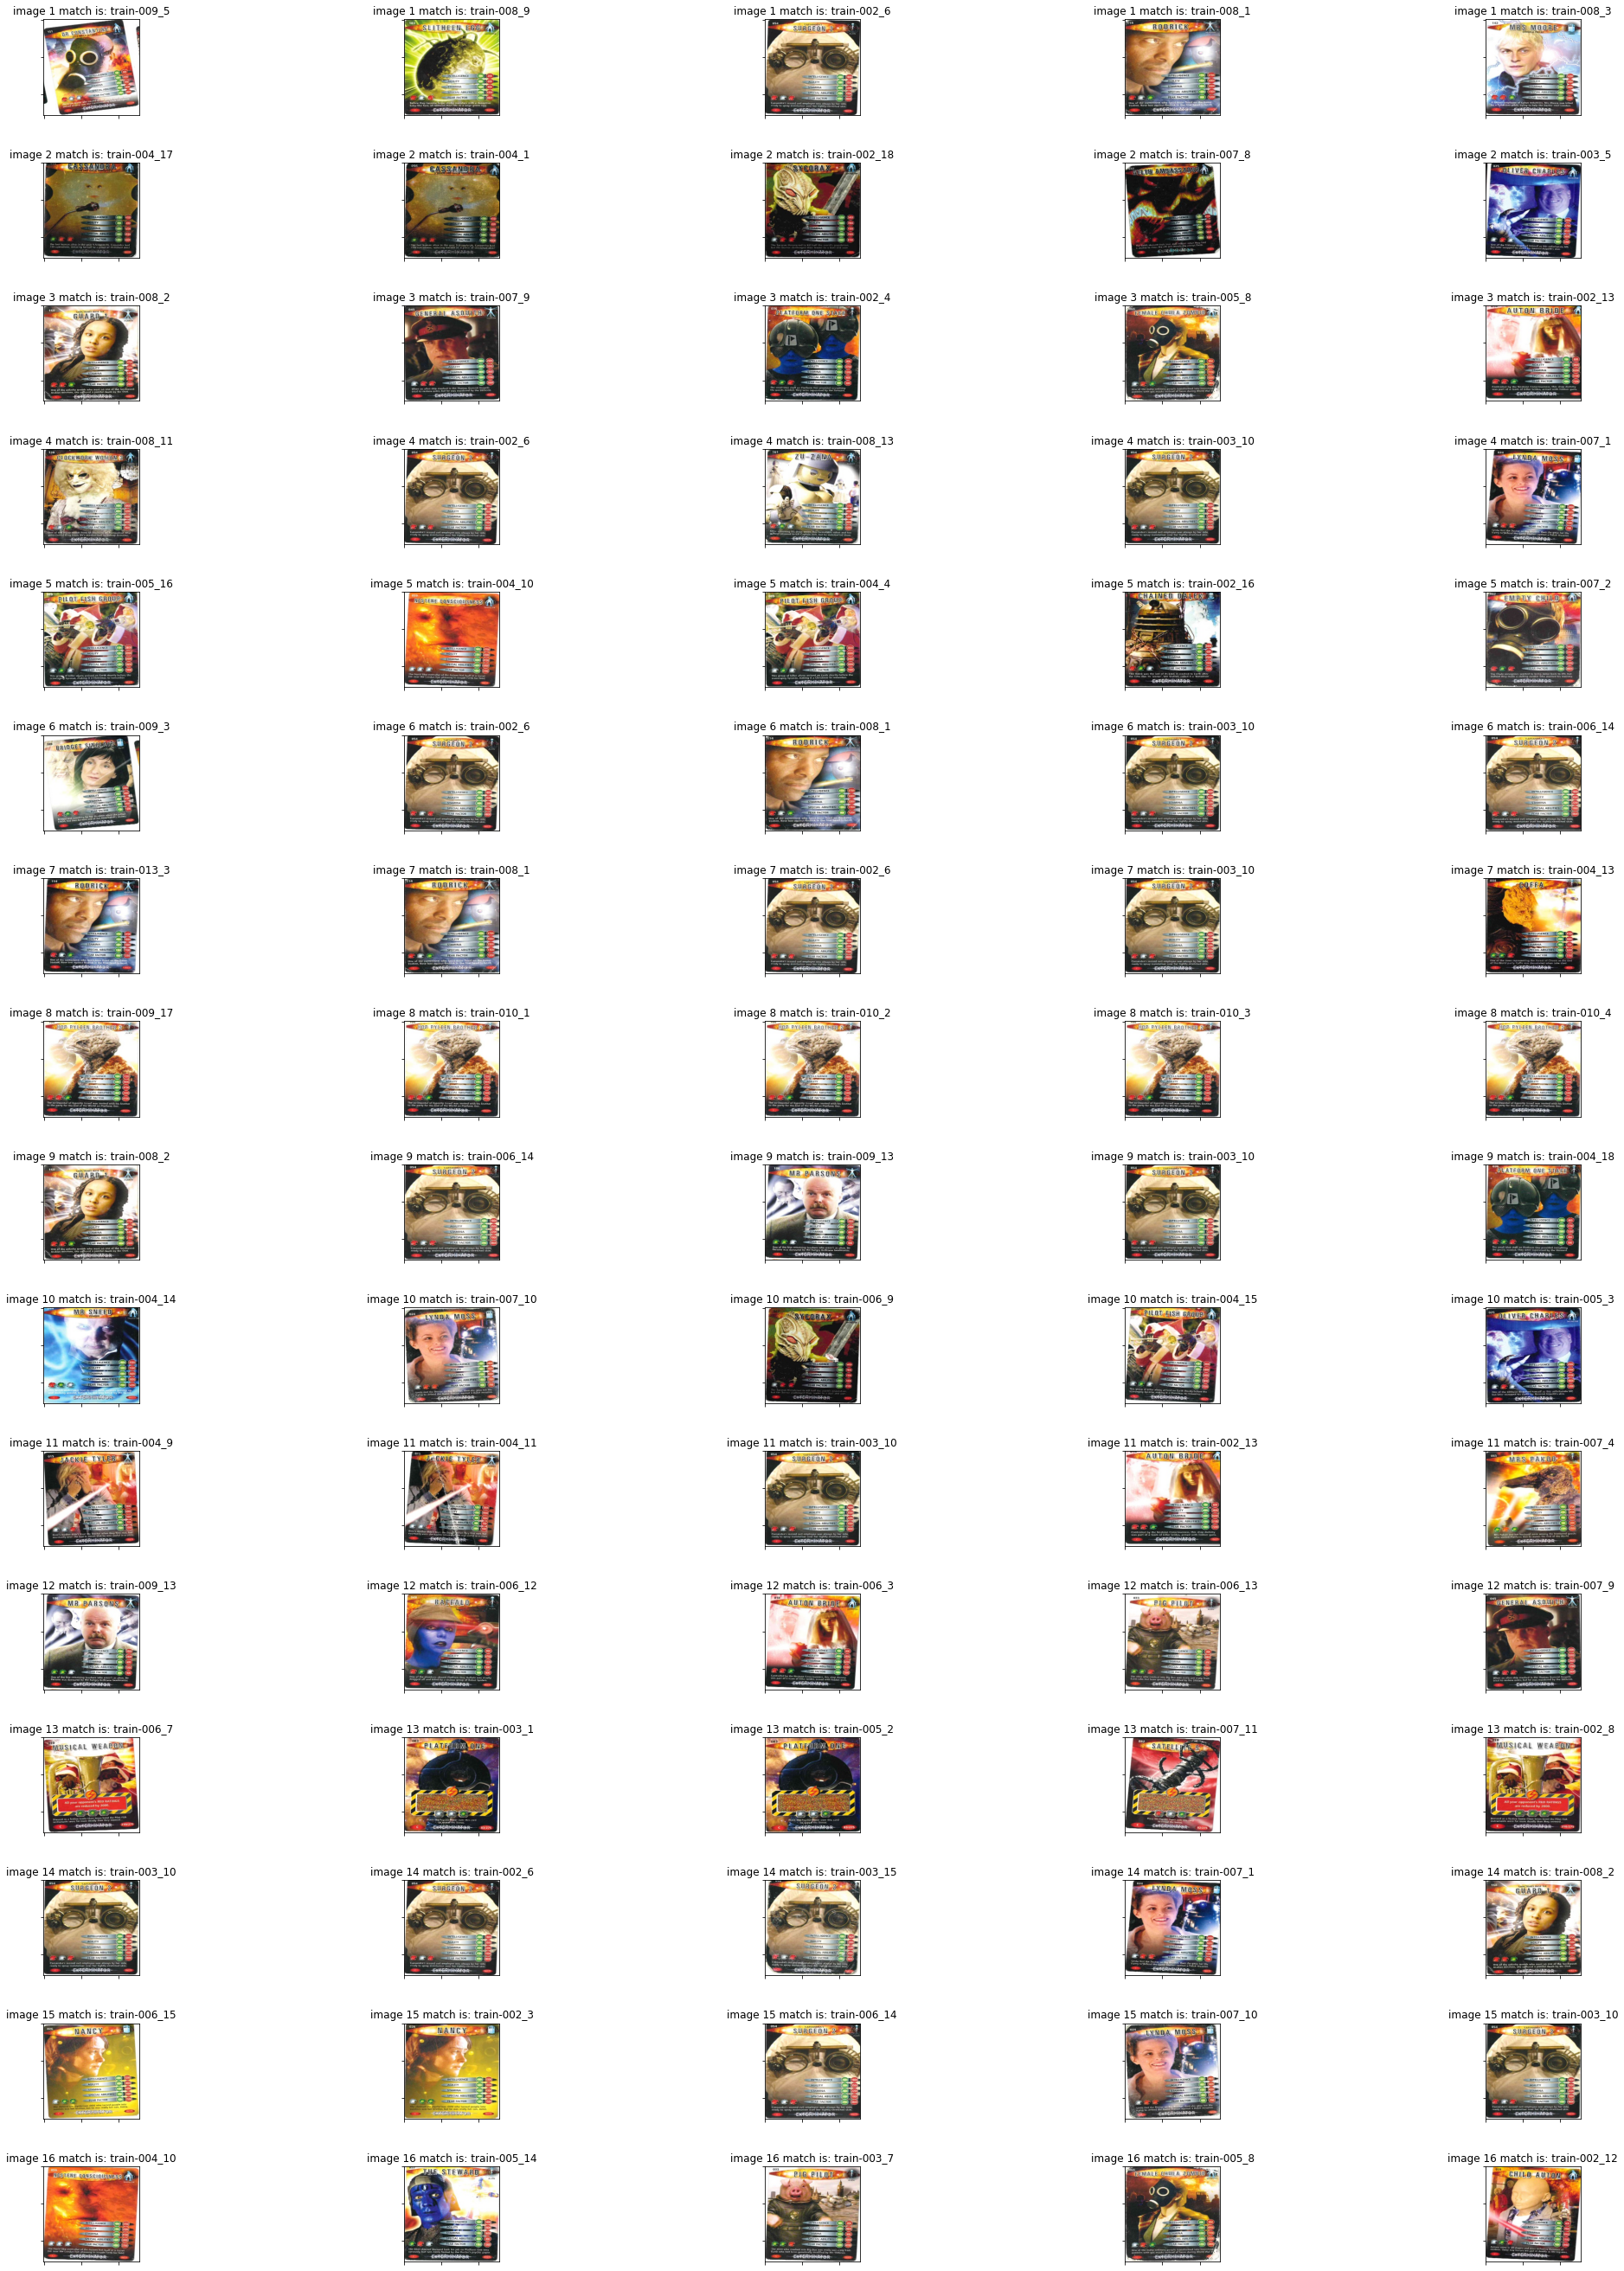

In [ ]:
from matplotlib import gridspec                                                       #to create grid of images
nrow = 16                             
ncol = 5

fig = plt.figure(figsize=(40, 40))    

gs = gridspec.GridSpec(nrow, ncol, width_ratios=[0.5, 0.5, 0.5,0.5,0.5],             
         wspace=0.5, hspace=0.5, top=0.95, bottom=0.05, left=0.17, right=0.845) 

for i in range(len(match_list_001)):                                                  #match_list_001 is iterated
    for j in range(len(match_list_001[i])):
      r= match_list_001[i][j]                                                         #match_list_001[i][j] contains the index of the matched image
      im = images[r]                                                                  #image with r index is found from images list
      ax= plt.subplot(gs[i,j])                                                        #subplots being created
      ax.imshow(im)
      ax.set_xticklabels([])
      ax.set_yticklabels([])
      ax.title.set_text(f'image {i+1} match is: {names[r]}')               

plt.show()
